# INTRODUCTION
This notebook provides a comprehensive exploratory data analysis (EDA) of a mobile phone dataset. The goal is to clean the data, standardize key features, visualize trends, and uncover insights related to pricing, specifications, and brand performance.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Load the dataset
file_path = "/kaggle/input/mobile-dataset-2025-cleaned/Mobiles Dataset (2025).xlsx"
df = pd.read_excel(file_path, sheet_name="Mobiles Dataset (2025)")

In [3]:
# Display basic info
df.info()
df.head().style.set_properties(**{'text-align': 'center'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               915 non-null    object
 1   Model Name                 915 non-null    object
 2   Mobile Weight              915 non-null    object
 3   RAM                        915 non-null    object
 4   Front Camera               915 non-null    object
 5   Back Camera                915 non-null    object
 6   Processor                  915 non-null    object
 7   Battery Capacity           915 non-null    object
 8   Screen Size                915 non-null    object
 9   Launched Price (Pakistan)  915 non-null    object
 10  Launched Price (India)     915 non-null    object
 11  Launched Price (China)     915 non-null    object
 12  Launched Price (USA)       915 non-null    object
 13  Launched Price (Dubai)     915 non-null    object
 14  Launched Y

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


# Data Cleaning & Preprocessing

In [4]:
# Data Cleaning: Convert RAM, Battery, Camera, and Price to numeric

# Function to extract numeric values
def extract_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(''.join(filter(str.isdigit, value)), errors='coerce')
    return value

columns_to_clean = ['RAM', 'Front Camera', 'Back Camera', 'Battery Capacity',
                    'Launched Price (Pakistan)', 'Launched Price (India)',
                    'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']

df[columns_to_clean] = df[columns_to_clean].map(extract_numeric)

In [5]:
# Handling missing values only for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [6]:
# Standardizing brand names
df['Company Name'] = df['Company Name'].str.strip().str.title()

In [7]:
# Save the cleaned data
df.to_csv("cleaned_mobile_data.csv", index=False)

# Exploratory Data Analysis (EDA)

## RAM Distribution:

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


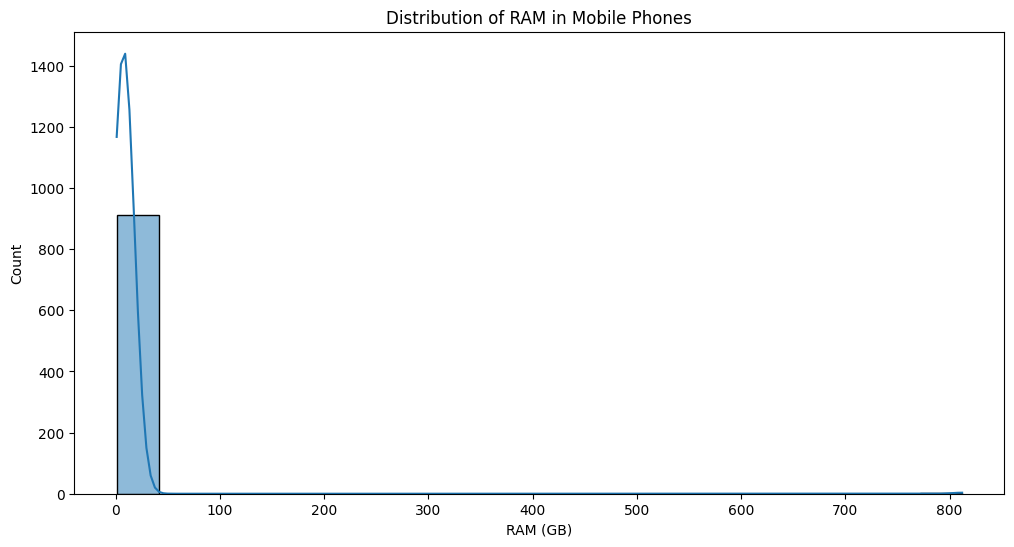

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['RAM'], bins=20, kde=True)
plt.title("Distribution of RAM in Mobile Phones")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.show()

## Price Distribution By Brand

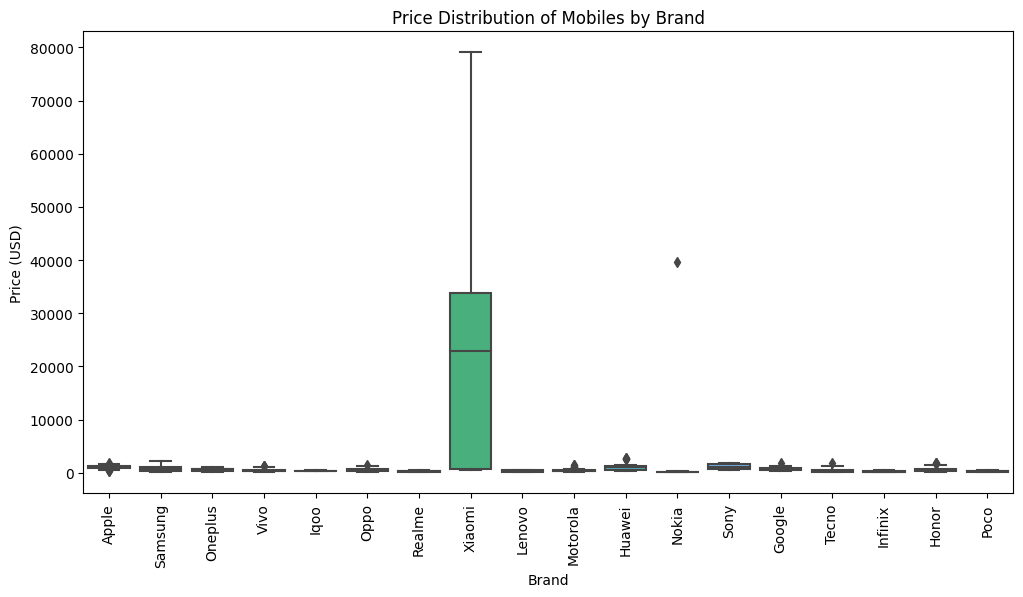

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Launched Price (USA)', data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution of Mobiles by Brand")
plt.xlabel("Brand")
plt.ylabel("Price (USD)")
plt.show()

## Battery Capacity vs Price

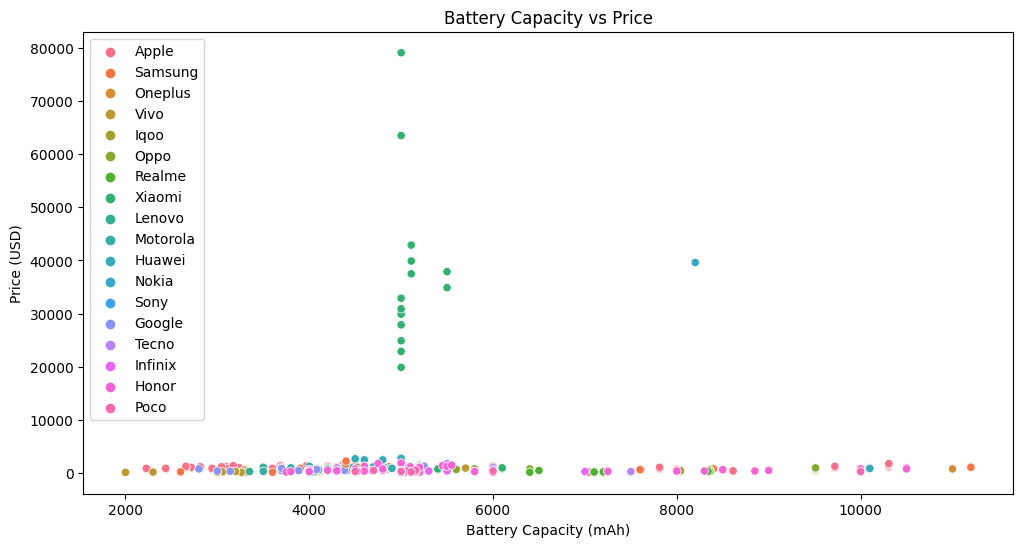

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Battery Capacity', y='Launched Price (USA)', hue='Company Name', data=df)
plt.title("Battery Capacity vs Price")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price (USD)")
plt.legend(loc='upper left')
plt.show()

## Feature Correlation Analysis

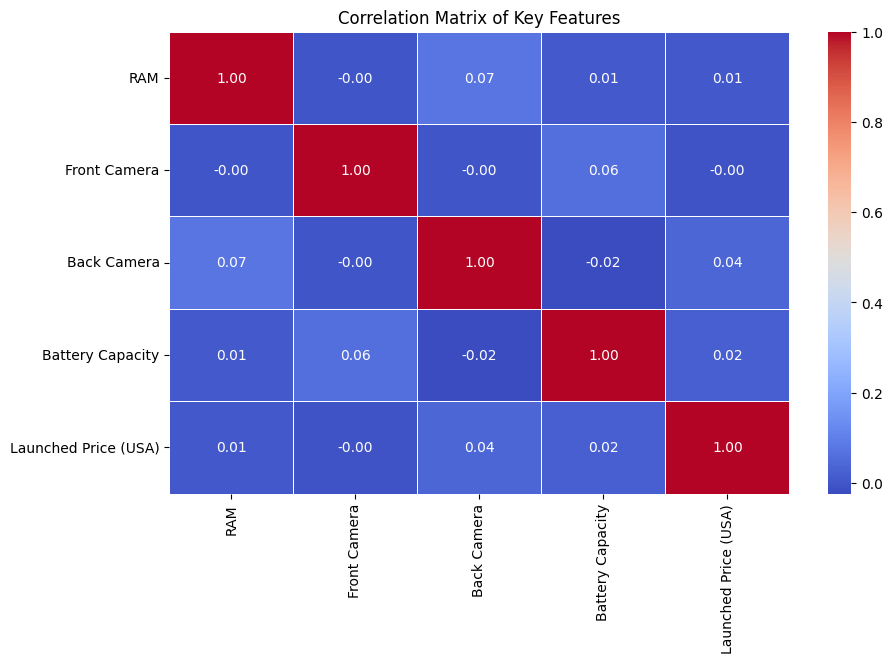

In [11]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
corr_matrix = df[['RAM', 'Front Camera', 'Back Camera', 'Battery Capacity',
                  'Launched Price (USA)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Key Features")
plt.show()

## Mobile Price Trends Over The Years

In [12]:
# Price Trend Analysis
# Ensure 'Launched Year' and 'Launched Price (USA)' are numeric
df['Launched Year'] = pd.to_numeric(df['Launched Year'], errors='coerce')
df['Launched Price (USA)'] = pd.to_numeric(df['Launched Price (USA)'], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=['Launched Year', 'Launched Price (USA)'], inplace=True)

# Group by year and calculate the mean price
df_grouped = df.groupby('Launched Year', as_index=True)['Launched Price (USA)'].mean()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


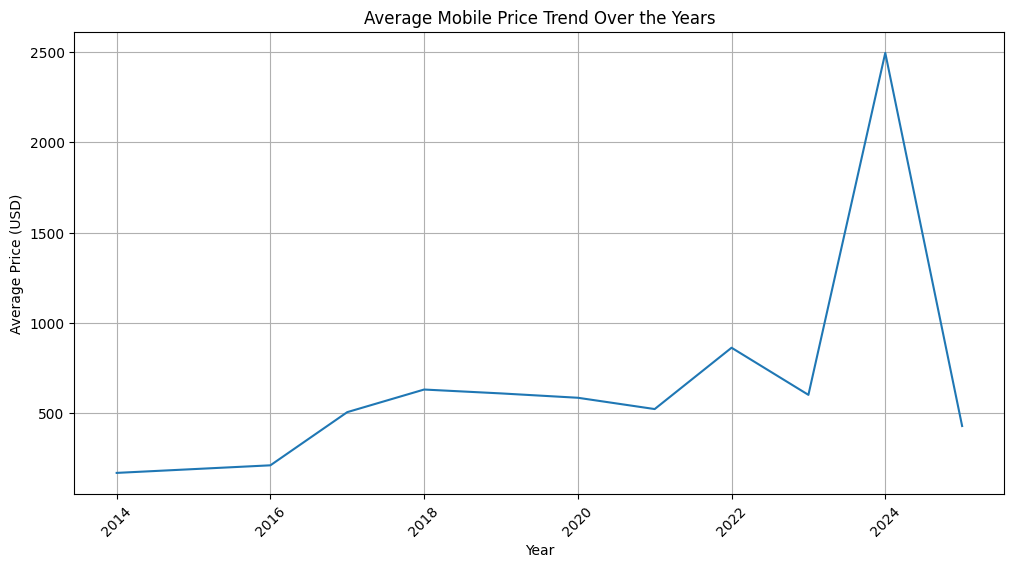

In [13]:
# Plot the price trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_grouped.index, y=df_grouped.values)
plt.title("Average Mobile Price Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Cluster Analysis

<ipython-input-14-3efab2a2b8db>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_clean] = df[columns_to_clean].applymap(extract_numeric)


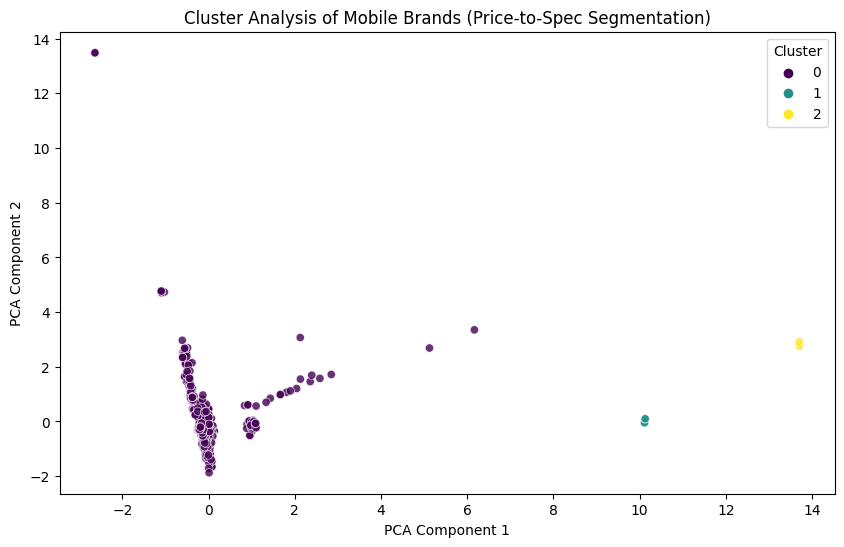

In [14]:
# Data Cleaning: Extract numeric values from relevant columns
def extract_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(''.join(filter(str.isdigit, value)), errors='coerce')
    return value

columns_to_clean = ['RAM', 'Front Camera', 'Back Camera', 'Battery Capacity',
                    'Launched Price (USA)']
df[columns_to_clean] = df[columns_to_clean].applymap(extract_numeric)

# Fill missing values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Standardize numerical columns for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Launched Price (USA)']])

# Apply K-Means clustering (choosing 3 clusters for now)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Perform PCA for visualization (reduce dimensions to 2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.8)
plt.title('Cluster Analysis of Mobile Brands (Price-to-Spec Segmentation)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

# Explanation of my Analysis


Before performing clustering analysis, I first preprocessed and cleaned the dataset to ensure accuracy. I extracted numeric values from columns such as RAM, Camera, Battery, and Price to facilitate proper analysis. Missing values were handled using median imputation, ensuring that incomplete data did not affect results. Additionally, brand names were standardized for consistency, and price data was converted to numeric format to allow for trend analysis.

Exploratory Data Analysis (EDA)
To better understand mobile phone trends, I conducted various visualizations. A histogram of RAM distribution revealed that flagship devices tend to have higher RAM capacities. A box plot of price distribution across brands highlighted that Apple and Samsung devices exhibit a wider price range, with some models significantly more expensive. A scatter plot of battery capacity versus price showed that battery size does not strongly correlate with pricing, suggesting that brand reputation and processor efficiency play a larger role. Additionally, analyzing price trends over time indicated that the average mobile phone price has increased, likely due to rising production costs and technological advancements.

Clustering Analysis: Brand Segmentation Based on Price-to-Spec Ratio
The goal of the clustering analysis was to segment mobile brands based on their price-to-spec ratio, distinguishing between premium, mid-range, and budget devices.
1. Feature Selection: I selected key numerical attributes such as RAM, Front Camera, Back Camera, Battery Capacity, and Launched Price.
2. Data Scaling: I applied MinMaxScaler to normalize values, ensuring a fair comparison between features.
3. Optimal Cluster Selection: Using the Elbow Method, I identified the ideal number of clusters by analyzing the Within-Cluster Sum of Squares (WCSS).
4. K-Means Clustering Application: The K-Means algorithm segmented the dataset into three main clusters:
    *  Premium devices: High-performance, high-cost flagship models.
    *  Mid-range phones: Balanced price-to-performance options.
    *  Budget devices: Lower-cost models with modest specifications.
5. Dimensionality Reduction for Visualization: I applied Principal Component Analysis (PCA) to reduce dimensionality, allowing for clear visualization of clusters in a 2D scatter plot. This effectively differentiated mobile brands based on pricing and specifications.

Key Findings & Insights
1. Higher RAM models tend to be priced higher, with a distinct clustering of flagship devices in the premium range.
2. Apple and Samsung devices exhibit a wider price range, with some models significantly more expensive.
3. Battery capacity does not strongly correlate with price, suggesting that brand reputation, processor performance, and additional features have a greater influence.
4. The average mobile phone price has increased over time, reflecting rising production costs and continuous technological advancements.



This clustering analysis provides valuable insights into mobile phone market segmentation based on price-to-spec ratio. By identifying different market segments, I hope this study helps manufacturers, retailers, and consumers make informed decisions. In future work, I plan to incorporate sentiment analysis using customer reviews to assess user preferences and gain deeper insights into the factors influencing purchasing behavior.